### **Xarray**

Xarray is a Python package for working with labelled **multi-dimensional** arrays. Documentaion can be found [here](https://docs.xarray.dev/en/stable/index.html).

Installation line from their site:

```
conda install -c conda-forge xarray
```


In [1]:
import xarray as xr

import numpy as np
import pandas as pd

#### **Core data structures:**

`DataArray` is an implementation of a labeled, N-dimensional array. It is an a generalization of a `pandas.Series`. 

Let's create it (start with a panda-like 2 dimensions):

In [20]:
data = xr.DataArray(np.random.randn(3, 4), dims=("x", "y"), coords={"x": [10, 20,30]})
#print(data)
data # <--- gives a much nices print in Jupyter

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.19171136,  0.37046059,  2.66065018, -0.94309334],
       [-0.85535522,  0.18829332, -0.93864803, -1.28683975],
       [-0.66438436, -0.73127761,  0.71609982,  1.0542808 ]])
Coordinates:
  * x        (x) int64 10 20 30
Dimensions without coordinates: y

You can convert it to pandas:

In [21]:
df=data.to_pandas()
df

y,0,1,2,3
x,,,,
10,0.191711,0.370461,2.660650,-0.943093
20,-0.855355,0.188293,-0.938648,-1.286840
30,-0.664384,-0.731278,0.716100,1.054281


Here we see that "dims" are labels for dimensions and "coords" are "labels" along the `x` axis. 
We can generate that directly from pandas:

In [22]:
df = pd.read_csv('data/example.csv', index_col=0)
#print(df)
data=xr.DataArray(df)
data

<xarray.DataArray (name: 11, dim_1: 4)>
array([[24, 18, 30, 20],
       [18, 27, 29, 27],
       [21, 24, 28, 27],
       [30, 30, 29, 30],
       [24, 25, 27, 21],
       [23, 26, 30, 30],
       [18, 28, 26, 24],
       [19, 20, 27, 27],
       [24, 29, 23, 26],
       [24, 25, 26, 30],
       [20, 20, 18, 18]])
Coordinates:
  * name     (name) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
  * dim_1    (dim_1) object 'course1' 'course2' 'course3' 'course4'

In [23]:
print(data.dims)
print(data.coords)

('name', 'dim_1')
Coordinates:
  * name     (name) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
  * dim_1    (dim_1) object 'course1' 'course2' 'course3' 'course4'


In [24]:
#there seems to not be an inplace option for this, 
#so if you work on a big dataset, time to see if this takes too long
data=data.rename({"dim_1":"course", "name":"pname"})
data

<xarray.DataArray (pname: 11, course: 4)>
array([[24, 18, 30, 20],
       [18, 27, 29, 27],
       [21, 24, 28, 27],
       [30, 30, 29, 30],
       [24, 25, 27, 21],
       [23, 26, 30, 30],
       [18, 28, 26, 24],
       [19, 20, 27, 27],
       [24, 29, 23, 26],
       [24, 25, 26, 30],
       [20, 20, 18, 18]])
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'

Accessing data:

positional, like numpy:

In [25]:
data[0, :]

<xarray.DataArray (course: 4)>
array([24, 18, 30, 20])
Coordinates:
    pname    <U5 'Marie'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'

In [8]:
data[0,3]

<xarray.DataArray ()>
array(20)
Coordinates:
    pname    <U5 'Marie'
    course   <U7 'course4'

"location": positional and coordinate label, like pandas:

In [9]:
data.loc["Marie"]

<xarray.DataArray (course: 4)>
array([24, 18, 30, 20])
Coordinates:
    pname    <U5 'Marie'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'

isel ("integer select") :  by dimension name and integer label

In [10]:
#note how here you don't use quotes for names of dimensions
#they are treated like variable names instead
#this might be confusing
data.isel(pname=2) 

<xarray.DataArray (course: 4)>
array([21, 24, 28, 27])
Coordinates:
    pname    <U4 'Kati'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'

In fact, this is actually a variable name, and this is why we named "name" to "pname" - it would clash with the "name of the array" otherwise

In [26]:
print(data.pname)
print(data.course)
print(data.name)

<xarray.DataArray 'pname' (pname: 11)>
array(['Marie', 'John', 'Kati', 'Olaf', 'Mark', 'Olga', 'Jean', 'Alex', 'Pier',
       'Bennet', 'Luis'], dtype=object)
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
<xarray.DataArray 'course' (course: 4)>
array(['course1', 'course2', 'course3', 'course4'], dtype=object)
Coordinates:
  * course   (course) object 'course1' 'course2' 'course3' 'course4'
None


sel: by dimension name and coordinate label

In [27]:
data.sel(pname="Marie")

<xarray.DataArray (course: 4)>
array([24, 18, 30, 20])
Coordinates:
    pname    <U5 'Marie'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'

There are also "attributes" of the array that you can set (to store "meta data"):

In [28]:
data.attrs["long_name"] = "those are courses"

data.attrs["units"] = "they are grades out of 30"

data.attrs["description"] = "random fake grades data"

data.attrs["random_attribute"] = 123

data.attrs

{'long_name': 'those are courses',
 'units': 'they are grades out of 30',
 'description': 'random fake grades data',
 'random_attribute': 123}

#### **Computations:**

(here we go with nonsense operations on grades again)

In [29]:
data + 10

<xarray.DataArray (pname: 11, course: 4)>
array([[34, 28, 40, 30],
       [28, 37, 39, 37],
       [31, 34, 38, 37],
       [40, 40, 39, 40],
       [34, 35, 37, 31],
       [33, 36, 40, 40],
       [28, 38, 36, 34],
       [29, 30, 37, 37],
       [34, 39, 33, 36],
       [34, 35, 36, 40],
       [30, 30, 28, 28]])
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'

In [30]:
np.sin(data)

<xarray.DataArray (pname: 11, course: 4)>
array([[-0.90557836, -0.75098725, -0.98803162,  0.91294525],
       [-0.75098725,  0.95637593, -0.66363388,  0.95637593],
       [ 0.83665564, -0.90557836,  0.27090579,  0.95637593],
       [-0.98803162, -0.98803162, -0.66363388, -0.98803162],
       [-0.90557836, -0.13235175,  0.95637593,  0.83665564],
       [-0.8462204 ,  0.76255845, -0.98803162, -0.98803162],
       [-0.75098725,  0.27090579,  0.76255845, -0.90557836],
       [ 0.14987721,  0.91294525,  0.95637593,  0.95637593],
       [-0.90557836, -0.66363388, -0.8462204 ,  0.76255845],
       [-0.90557836, -0.13235175,  0.76255845, -0.98803162],
       [ 0.91294525,  0.91294525, -0.75098725, -0.75098725]])
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'
Attributes:
    long_name:         those are courses
    units:             they are grades out of 30
    description:       random fake grades data
    random_attribute:  123

In [16]:
#help(data)
print(data.sum())
print(data.sum(axis=1))
print(data.mean(axis=0))
print(data.mean(dim="course"))

<xarray.DataArray ()>
array(1090)
<xarray.DataArray (pname: 11)>
array([ 92, 101, 100, 119,  97, 109,  96,  93, 102, 105,  76])
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
<xarray.DataArray (course: 4)>
array([22.27272727, 24.72727273, 26.63636364, 25.45454545])
Coordinates:
  * course   (course) object 'course1' 'course2' 'course3' 'course4'
<xarray.DataArray (pname: 11)>
array([23.  , 25.25, 25.  , 29.75, 24.25, 27.25, 24.  , 23.25, 25.5 ,
       26.25, 19.  ])
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'


#### **Plotting:**

Text(0.5, 1.0, 'This is a title')

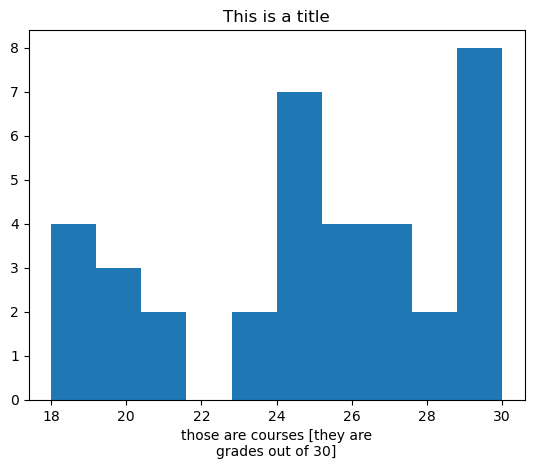

In [17]:
#if the data makes sense to just plot, it can be done with just "plot"
#labels are taken from attributes, you can overwite with matplotlib
import matplotlib.pyplot as plt
data[2:].plot.hist()
plt.title("This is a title")

[Documentaion](https://docs.xarray.dev/en/stable/user-guide/plotting.html#plotting) for plotting says you always need `import matplotlib.pyplot as plt`, but it seems to work fine for me without doing that if you are not making modifications to the default picture. That link also has a lot of plotting examples you might want to use if you work with complicated data.

### **DataSets:**

DataSet is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.



In [18]:
#the easiest is to create it from an array
ds=data.to_dataset(name="grades")
ds

<xarray.Dataset>
Dimensions:  (pname: 11, course: 4)
Coordinates:
  * pname    (pname) object 'Marie' 'John' 'Kati' ... 'Pier' 'Bennet' 'Luis'
  * course   (course) object 'course1' 'course2' 'course3' 'course4'
Data variables:
    grades   (pname, course) int64 24 18 30 20 18 27 29 ... 25 26 30 20 20 18 18